In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 30)

In [2]:
base_df = pd.read_csv("../data/newborn-diseases.csv")
base_df.head()

,Race/Ethnicity,Case Count,Disorder Type,Screened Count,"Rate per 100,000"
0,American Indian,15,Other Rare Disorders,32300,46.44
1,American Indian,20,"Hypothyroidism, Primary Congenital (PCH)",32300,61.92
2,Asian Indian,26,Other Rare Disorders,68559,37.92
3,Asian Indian,70,"Hypothyroidism, Primary Congenital (PCH)",68559,102.10
4,Black,26,Other Rare Disorders,181203,14.35


In [3]:
race_list = ["White", "Black or African American", "American Indian and/or Alaska Native", "Asian",
         "Hispanic or Latino", "Mixed Race", 'Other', 'Not Reported']

races_dict = {'American Indian': "American Indian and/or Alaska Native",
        'Asian Indian': "Asian", 'Chinese/Japanese/Korean': "Asian", 
        'Filipino/Laotian/Vietnamese/Cambodian/Other SouthEast Asian': "Asian",
        'Middle Eastern': "Asian", 'Black': "Black or African American",
        'Hispanic': "Hispanic or Latino", 'Multiple': 'Mixed Race',
        'White': 'White', 'Other': 'Other', 'Unknown': 'Not Reported'}

In [4]:
race_df = base_df.groupby("Race/Ethnicity", as_index=False).sum()
race_df['Screened Count'] = base_df.groupby("Race/Ethnicity", as_index=False).mean()['Screened Count']

for x in range(len(race_df)):
    race = race_df.iloc[x, 0]
    race_df.iloc[x, 0] = races_dict[race]

grouped_race = race_df.groupby("Race/Ethnicity", as_index = False).sum()
grouped_race['Rate per 100,000'] = round(grouped_race['Case Count']*100000/grouped_race['Screened Count'], 2)
grouped_race

,Race/Ethnicity,Case Count,Screened Count,"Rate per 100,000"
0,American Indian and/or Alaska Native,43,32300.0,133.13
1,Asian,319,415866.0,76.71
2,Black or African American,557,181203.0,307.39
3,Hispanic or Latino,1674,1680138.0,99.63
4,Mixed Race,170,214735.0,79.17
5,Not Reported,26,29908.0,86.93
6,Other,66,57677.0,114.43
7,White,822,876179.0,93.82


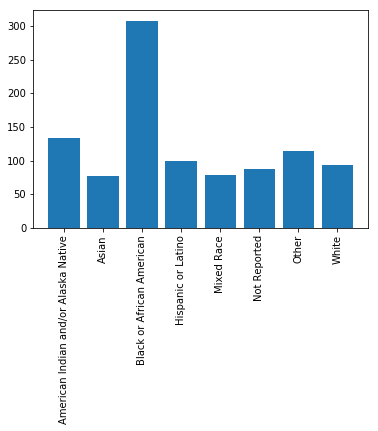

In [16]:
plt.bar(grouped_race['Race/Ethnicity'], grouped_race['Rate per 100,000'])
plt.xticks(rotation=90)
plt.savefig('../images/bar.png')
plt.show()

In [6]:
sorted_df = grouped_race.sort_values("Case Count")
sorted_df

,Race/Ethnicity,Case Count,Screened Count,"Rate per 100,000"
5,Not Reported,26,29908.0,86.93
0,American Indian and/or Alaska Native,43,32300.0,133.13
6,Other,66,57677.0,114.43
4,Mixed Race,170,214735.0,79.17
1,Asian,319,415866.0,76.71
2,Black or African American,557,181203.0,307.39
7,White,822,876179.0,93.82
3,Hispanic or Latino,1674,1680138.0,99.63


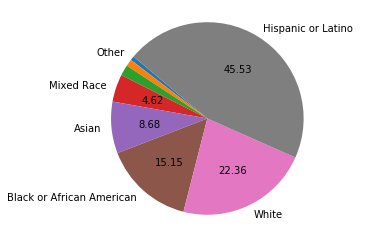

<Figure size 432x288 with 0 Axes>

In [12]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''

plt.pie(sorted_df['Case Count'], labels=['Other', '', ''] + sorted_df['Race/Ethnicity'][3:].tolist(), 
        autopct=my_autopct, startangle=140)
plt.axis('equal')
plt.show()
plt.savefig('../images/pie.png')

In [ ]:
grouped_race.to_csv("../data/cleaned/groupedRace.csv", index=False)